In [44]:
# Importing the necessary packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Extracting the data

In [2]:
data = pd.read_csv('D:/Data Science/Class 19,20(28,29-10-23)/b88assignments/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/Salary_Data.csv')

# Preprocessing the data(copying the data)

data1 = data.copy()

In [7]:
data1.info()
# Since it has non-null values there is no proprocessing needs to be done
# Here we can see YearsExperience is the independent variable and Salary is the dependant variable
# According to that we will choose the x and y value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Pattern Analysis/EDA

In [8]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Regression plot

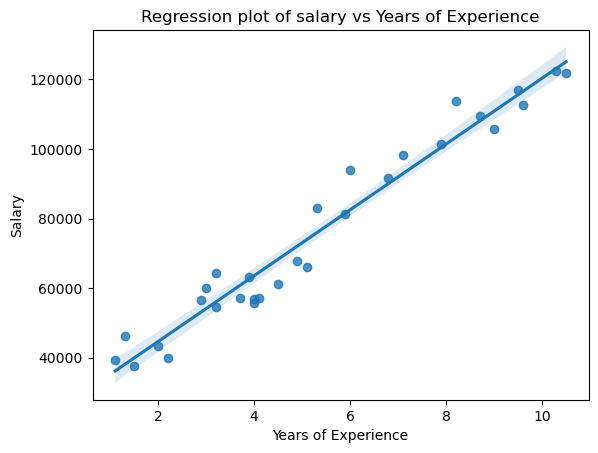

In [15]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Regression_plot_Salary_Analysis.png')
sns.regplot(x= 'YearsExperience', y = 'Salary', data = data1)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression plot of salary vs Years of Experience')
plt.savefig(file_path)
plt.show()

In [11]:
data1.corr()
# From the graph and correlation we can see that it is a strong positive correlation between
# Experience and Salary

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Histogram

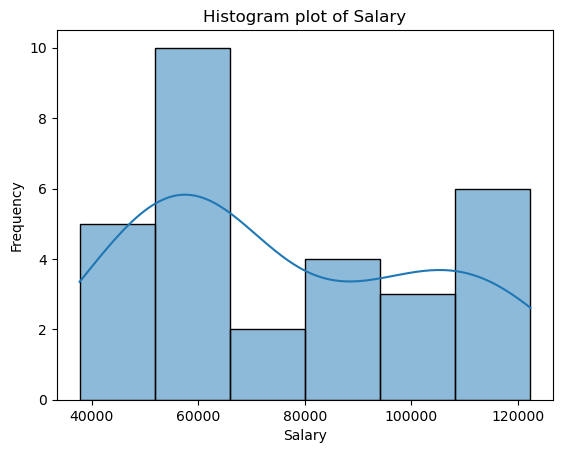

In [20]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Histogram_plot_Salary_Analysis.png')
sns.histplot(x = 'Salary', data = data1, kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram plot of Salary')
plt.savefig(file_path)
plt.show()

In [21]:
import scipy.stats as stats
skewness = stats.skew(data1['Salary'])
print(f'Skewness of Salary data: {skewness: .2f}')

Skewness of Salary data:  0.34


In [22]:
# From the skewness value, we can stat that it is slightly right skewed
# But it is not strong enough to consider

# Box Plot

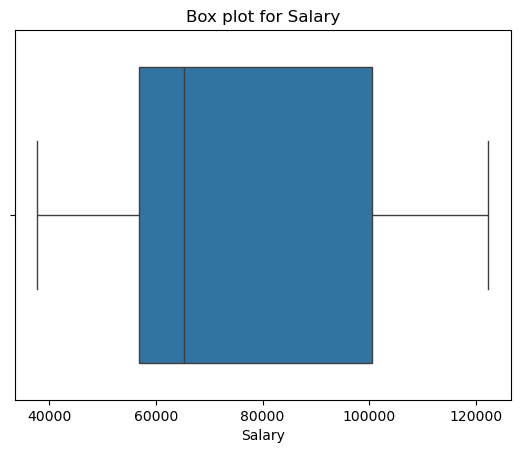

In [25]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Box_plot_Salary_Analysis.png')
sns.boxplot(x = 'Salary', data= data1)
plt.xlabel('Salary')
plt.title('Box plot for Salary')
plt.savefig(file_path)
plt.show()

In [26]:
# From this we can conclude that there is no outliers

# Line plot

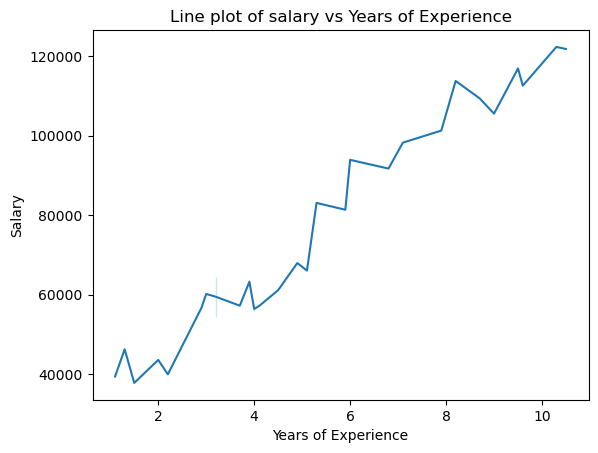

In [27]:
path = 'D:/Linear_Regression_Assignment/'
file_path = os.path.join(path, 'Line_plot_Salary_Analysis.png')
sns.lineplot(x= 'YearsExperience', y = 'Salary', data = data1)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Line plot of salary vs Years of Experience')
plt.savefig(file_path)
plt.show()

In [28]:
# Salary increases with years of Experience but it is not perfectly linear

# Model planning

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
lr = LinearRegression()

In [31]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
x = np.array(data1['YearsExperience']).reshape(-1,1)

In [53]:
y = np.array(data1['Salary']).reshape(-1,1)

# Splitting the train_test_split as 80:20

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [55]:
x_train.shape, y_train.shape

((24, 1), (24, 1))

In [56]:
x_test.shape, y_test.shape

((6, 1), (6, 1))

In [57]:
lr_fit = lr.fit(x_train, y_train)

In [59]:
lr.coef_

array([[9318.16584004]])

In [60]:
lr.intercept_

array([25721.70848578])

In [69]:
x_test = np.array(x_test).reshape(-1,1)

In [70]:
pred = lr.predict(x_test)
pred

array([[ 37835.32407784],
       [102130.66837412],
       [ 62994.37184595],
       [ 91880.68595008],
       [114244.28396618],
       [ 62062.55526195]])

In [71]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(6, 1)

In [72]:
y_test.shape

(6, 1)

In [74]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)

In [75]:
data1_pred

,Pred,Actual
0,37835.324078,46205.0
1,102130.668374,113812.0
2,62994.371846,55794.0
3,91880.685950,98273.0
4,114244.283966,116969.0
5,62062.555262,63218.0


In [79]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.9361


In [80]:
# From the r2_score we can see that it is a good fit
# The Predictive power is high
# And there is a strong relationship between the years of experience and the salary

In [85]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 7164.39


In [84]:
# High RMSE value indicates that model's predictions have some degree of error

# Splitting the train_test_split as 75:25

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75)

In [87]:
x_train.shape, y_train.shape

((22, 1), (22, 1))

In [88]:
x_test.shape, y_test.shape

((8, 1), (8, 1))

In [89]:
lr_fit = lr.fit(x_train, y_train)

In [90]:
lr.coef_

array([[9668.19398193]])

In [91]:
lr.intercept_

array([24543.98995538])

In [92]:
x_test = np.array(x_test).reshape(-1,1)

In [93]:
pred = lr.predict(x_test)
pred

array([[124126.38796931],
       [ 68050.86287409],
       [ 39046.28092828],
       [ 37112.6421319 ],
       [ 73851.77926325],
       [ 55482.21069757],
       [ 62249.94648493],
       [ 90287.70903254]])

In [94]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(8, 1)

In [95]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)

In [96]:
data1_pred

,Pred,Actual
0,124126.387969,122391.0
1,68050.862874,61111.0
2,39046.280928,37731.0
3,37112.642132,46205.0
4,73851.779263,66029.0
5,55482.210698,64445.0
6,62249.946485,63218.0
7,90287.709033,91738.0


In [97]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.9439


In [ ]:
# From the r2_score we can see that it is a good fit
# The Predictive power is high
# And there is a strong relationship between the years of experience and the salary
# Also compare to 80:20 split this 75:25 split is giving a slightly better results

In [98]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 5917.58


In [99]:
# High RMSE value indicates that model's predictions have some degree of error
# But compare to previous values it is better

# Splitting the train_test_split as 70:30

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [101]:
x_train.shape, y_train.shape

((21, 1), (21, 1))

In [102]:
x_test.shape, y_test.shape

((9, 1), (9, 1))

In [103]:
lr_fit = lr.fit(x_train, y_train)

In [104]:
x_test = np.array(x_test).reshape(-1,1)

In [105]:
pred = lr.predict(x_test)
pred

array([[ 55723.83165346],
       [ 99779.28550935],
       [ 64159.98239182],
       [ 53849.13148938],
       [107278.08616567],
       [ 81032.28386855],
       [ 75408.18337631],
       [ 73533.48321223],
       [ 81969.63395059]])

In [106]:
data1_pred = pd.DataFrame(pred, columns=['Pred'])
data1_pred.shape

(9, 1)

In [107]:
data1_pred['Actual'] = np.array(y_test).reshape(-1,1)
data1_pred

,Pred,Actual
0,55723.831653,54445.0
1,99779.285509,101302.0
2,64159.982392,57081.0
3,53849.131489,60150.0
4,107278.086166,109431.0
5,81032.283869,81363.0
6,75408.183376,83088.0
7,73533.483212,66029.0
8,81969.633951,93940.0


In [108]:
r2 = r2_score(data1_pred['Actual'], data1_pred['Pred'])
print(f'The R^2 Score of Actual and Predicted is {round(r2,4)}')

The R^2 Score of Actual and Predicted is 0.8909


In [109]:
rmse = sqrt(mean_squared_error(data1_pred['Actual'], data1_pred['Pred']))
print(f'The RMSE value of this model is {round(rmse, 2)}')

The RMSE value of this model is 6299.01


In [ ]:
# Camparing this values with the r2_score and RMSE score of
# previous two cases it is poor, so ideally we can take 75:25 fit as a perfect fit for this model